## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2,0.25,0.3,0.35]
num_neo=[[512,256,128,64],[512,256,128],[512,256]]

In [7]:
results = {}
for drp in Dropout_EXP:
    for num in num_neo:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num, drp_ratio=drp)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-dropout-%s-layers-%s" % (str(drp),str(len(num)+2))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 7s 132us/step - loss: 1.3497 - accuracy: 0.5184 - val_loss: 1.3490 - val_accuracy: 0.5140
Epoch 45/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3453 - accuracy: 0.5211 - val_loss: 1.3419 - val_accuracy: 0.5207
Epoch 46/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3399 - accuracy: 0.5215 - val_loss: 1.3431 - val_accuracy: 0.5212
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.3277 - accuracy: 0.5267 - val_loss: 1.3311 - val_accuracy: 0.5238
Epoch 48/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3192 - accuracy: 0.5268 - val_loss: 1.3386 - val_accuracy: 0.5164
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3226 - accuracy: 0.5275 - val_loss: 1.3296 - val_accuracy: 0.5265
Epoch 50/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3109 - accuracy: 0.5312 - val_loss:

50000/50000 [==============================] - 7s 131us/step - loss: 1.3029 - accuracy: 0.5361 - val_loss: 1.3154 - val_accuracy: 0.5329
Epoch 40/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2967 - accuracy: 0.5388 - val_loss: 1.3417 - val_accuracy: 0.5269
Epoch 41/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2902 - accuracy: 0.5428 - val_loss: 1.3112 - val_accuracy: 0.5402
Epoch 42/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2814 - accuracy: 0.5435 - val_loss: 1.3179 - val_accuracy: 0.5312
Epoch 43/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2740 - accuracy: 0.5442 - val_loss: 1.3248 - val_accuracy: 0.5242
Epoch 44/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2727 - accuracy: 0.5461 - val_loss: 1.3084 - val_accuracy: 0.5323
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2658 - accuracy: 0.5490 - val_loss:

50000/50000 [==============================] - 7s 130us/step - loss: 1.3062 - accuracy: 0.5397 - val_loss: 1.3404 - val_accuracy: 0.5224
Epoch 37/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2994 - accuracy: 0.5428 - val_loss: 1.3328 - val_accuracy: 0.5244
Epoch 38/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2952 - accuracy: 0.5448 - val_loss: 1.3349 - val_accuracy: 0.5281
Epoch 39/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2860 - accuracy: 0.5468 - val_loss: 1.3370 - val_accuracy: 0.5196
Epoch 40/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2766 - accuracy: 0.5514 - val_loss: 1.3243 - val_accuracy: 0.5251
Epoch 41/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2689 - accuracy: 0.5512 - val_loss: 1.3240 - val_accuracy: 0.5274
Epoch 42/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2667 - accuracy: 0.5535 - val_loss:

50000/50000 [==============================] - 7s 132us/step - loss: 1.5097 - accuracy: 0.4593 - val_loss: 1.4292 - val_accuracy: 0.4903
Epoch 30/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4999 - accuracy: 0.4640 - val_loss: 1.4213 - val_accuracy: 0.4850
Epoch 31/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4938 - accuracy: 0.4632 - val_loss: 1.4241 - val_accuracy: 0.4882
Epoch 32/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4851 - accuracy: 0.4700 - val_loss: 1.4177 - val_accuracy: 0.4906
Epoch 33/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4728 - accuracy: 0.4725 - val_loss: 1.4186 - val_accuracy: 0.4926
Epoch 34/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4696 - accuracy: 0.4752 - val_loss: 1.4044 - val_accuracy: 0.5022
Epoch 35/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4606 - accuracy: 0.4790 - val_loss:

50000/50000 [==============================] - 6s 127us/step - loss: 1.4879 - accuracy: 0.4680 - val_loss: 1.4259 - val_accuracy: 0.4936
Epoch 25/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4754 - accuracy: 0.4736 - val_loss: 1.4215 - val_accuracy: 0.4933
Epoch 26/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4623 - accuracy: 0.4799 - val_loss: 1.4135 - val_accuracy: 0.4964
Epoch 27/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4540 - accuracy: 0.4828 - val_loss: 1.4046 - val_accuracy: 0.4993
Epoch 28/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4479 - accuracy: 0.4832 - val_loss: 1.4027 - val_accuracy: 0.5021
Epoch 29/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4340 - accuracy: 0.4875 - val_loss: 1.3972 - val_accuracy: 0.5011
Epoch 30/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4300 - accuracy: 0.4904 - val_loss:

50000/50000 [==============================] - 7s 132us/step - loss: 1.4618 - accuracy: 0.4824 - val_loss: 1.4266 - val_accuracy: 0.4931
Epoch 22/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4543 - accuracy: 0.4861 - val_loss: 1.4224 - val_accuracy: 0.5011
Epoch 23/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4455 - accuracy: 0.4916 - val_loss: 1.4163 - val_accuracy: 0.5012
Epoch 24/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4355 - accuracy: 0.4939 - val_loss: 1.4056 - val_accuracy: 0.4990
Epoch 25/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4244 - accuracy: 0.4975 - val_loss: 1.4031 - val_accuracy: 0.5037
Epoch 26/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4177 - accuracy: 0.5000 - val_loss: 1.3937 - val_accuracy: 0.5033
Epoch 27/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4114 - accuracy: 0.5011 - val_loss:

50000/50000 [==============================] - 6s 128us/step - loss: 1.7489 - accuracy: 0.3680 - val_loss: 1.6280 - val_accuracy: 0.4172
Epoch 15/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7342 - accuracy: 0.3750 - val_loss: 1.6079 - val_accuracy: 0.4270
Epoch 16/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7246 - accuracy: 0.3765 - val_loss: 1.5959 - val_accuracy: 0.4310
Epoch 17/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7070 - accuracy: 0.3872 - val_loss: 1.5737 - val_accuracy: 0.4426
Epoch 18/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7019 - accuracy: 0.3853 - val_loss: 1.5686 - val_accuracy: 0.4412
Epoch 19/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6796 - accuracy: 0.3971 - val_loss: 1.5604 - val_accuracy: 0.4430
Epoch 20/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6708 - accuracy: 0.3996 - val_loss:

50000/50000 [==============================] - 6s 126us/step - loss: 1.7353 - accuracy: 0.3782 - val_loss: 1.6271 - val_accuracy: 0.4260
Epoch 10/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.7134 - accuracy: 0.3874 - val_loss: 1.6086 - val_accuracy: 0.4318
Epoch 11/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6987 - accuracy: 0.3944 - val_loss: 1.5913 - val_accuracy: 0.4416
Epoch 12/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6786 - accuracy: 0.4010 - val_loss: 1.5786 - val_accuracy: 0.4392
Epoch 13/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6625 - accuracy: 0.4095 - val_loss: 1.5574 - val_accuracy: 0.4509
Epoch 14/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6496 - accuracy: 0.4113 - val_loss: 1.5529 - val_accuracy: 0.4484
Epoch 15/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6327 - accuracy: 0.4164 - val_loss:

50000/50000 [==============================] - 6s 126us/step - loss: 1.7413 - accuracy: 0.3813 - val_loss: 1.6539 - val_accuracy: 0.4222
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7145 - accuracy: 0.3914 - val_loss: 1.6352 - val_accuracy: 0.4350
Epoch 8/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6873 - accuracy: 0.3998 - val_loss: 1.6139 - val_accuracy: 0.4353
Epoch 9/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6654 - accuracy: 0.4112 - val_loss: 1.5976 - val_accuracy: 0.4397
Epoch 10/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6469 - accuracy: 0.4179 - val_loss: 1.5750 - val_accuracy: 0.4508
Epoch 11/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6306 - accuracy: 0.4221 - val_loss: 1.5589 - val_accuracy: 0.4567
Epoch 12/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6157 - accuracy: 0.4287 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.3032 - accuracy: 0.1239 - val_loss: 2.2124 - val_accuracy: 0.2012
Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.1904 - accuracy: 0.1880 - val_loss: 2.0550 - val_accuracy: 0.2722
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0905 - accuracy: 0.2251 - val_loss: 1.9695 - val_accuracy: 0.3049
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.0346 - accuracy: 0.2450 - val_loss: 1.9201 - val_accuracy: 0.3268
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.9970 - accuracy: 0.2572 - val_loss: 1.8791 - val_accuracy: 0.3382
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.9600 - accuracy: 0.2763 - val_loss: 1.8365 - val_accuracy: 0.3512
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.2486 - accuracy: 0.1621 - val_loss: 2.0795 - val_accuracy: 0.2550
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0768 - accuracy: 0.2302 - val_loss: 1.9470 - val_accuracy: 0.3205
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9891 - accuracy: 0.2701 - val_loss: 1.8762 - val_accuracy: 0.3450
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9337 - accuracy: 0.2932 - val_loss: 1.8193 - val_accuracy: 0.3622
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8900 - accuracy: 0.3121 - val_loss: 1.7793 - val_accuracy: 0.3734
Epoch 6/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8567 - accuracy: 0.3279 - val_loss: 1.7449 - val_accuracy: 0.3830
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.1370 - accuracy: 0.2152 - val_loss: 1.9388 - val_accuracy: 0.3232
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9501 - accuracy: 0.2930 - val_loss: 1.8432 - val_accuracy: 0.3546
Epoch 3/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8804 - accuracy: 0.3254 - val_loss: 1.7865 - val_accuracy: 0.3776
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8323 - accuracy: 0.3442 - val_loss: 1.7430 - val_accuracy: 0.3926
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7953 - accuracy: 0.3605 - val_loss: 1.7132 - val_accuracy: 0.3933
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7632 - accuracy: 0.3722 - val_loss: 1.6753 - val_accuracy: 0.4088
Epoch 7/50
50000/50000 [==============================] - 6s 1

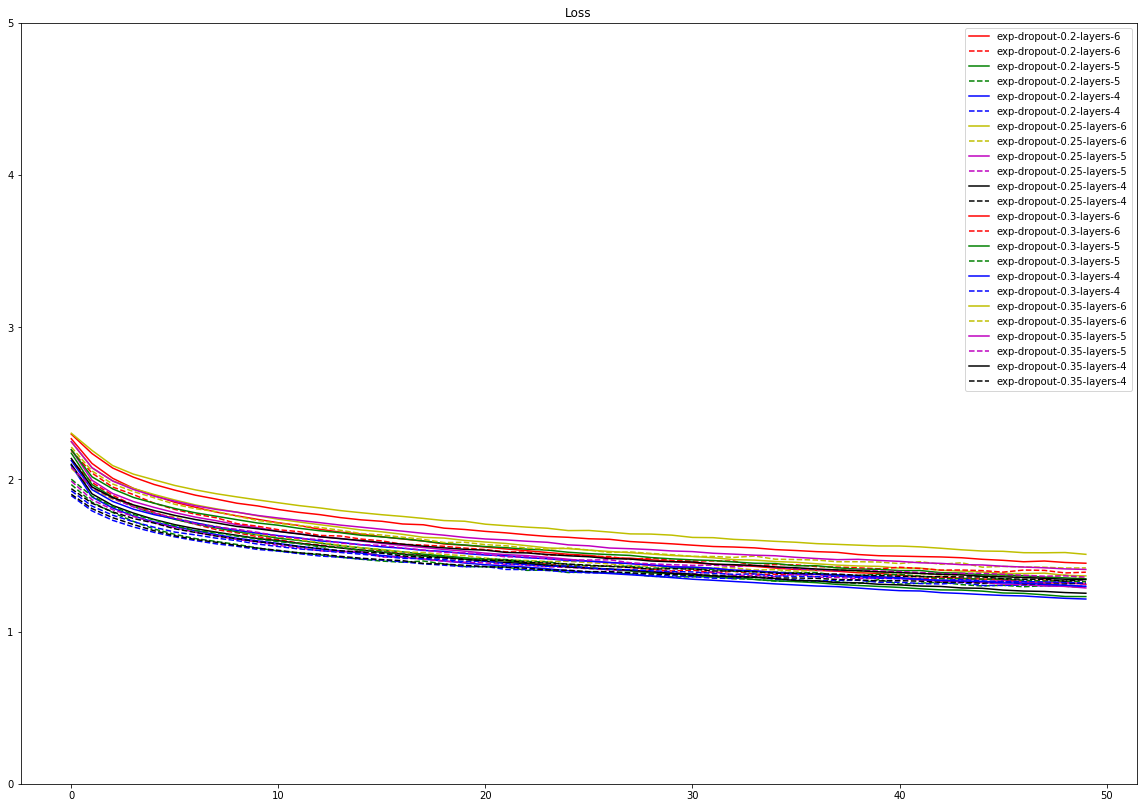

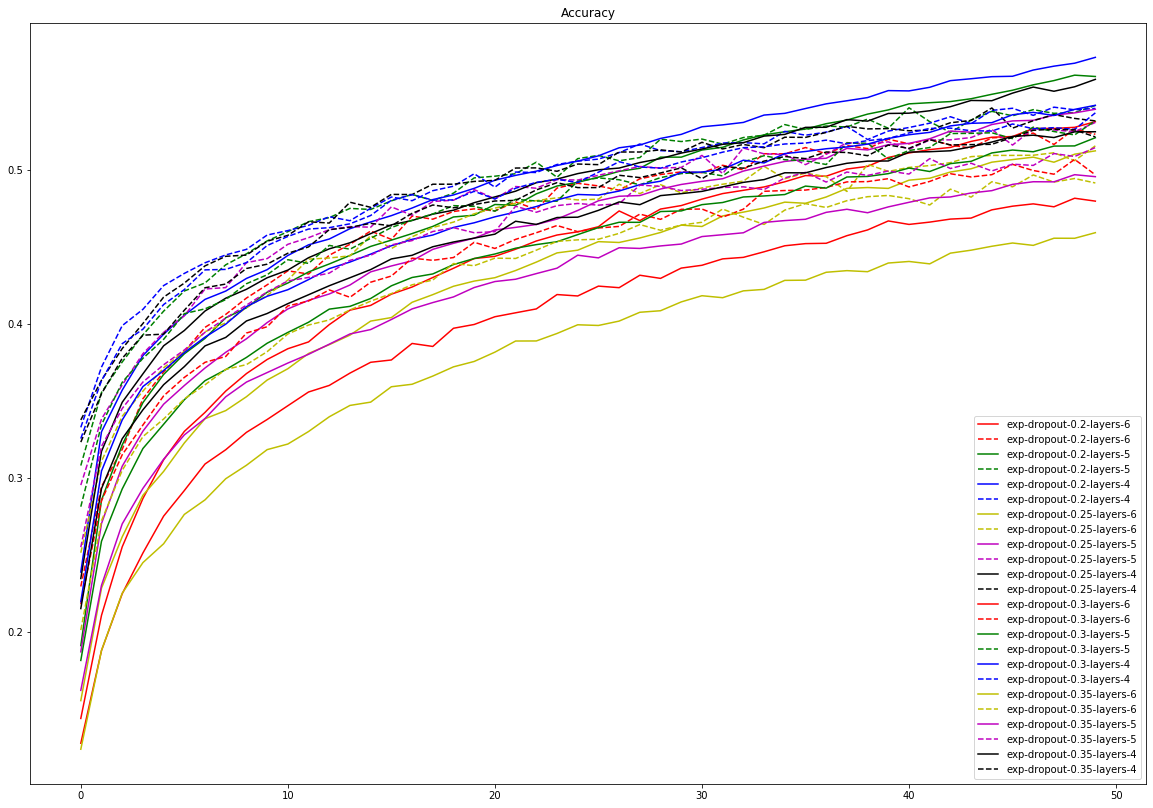

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=0.25)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 8s 152us/step - loss: 1.5267 - accuracy: 0.4504 - val_loss: 1.4816 - val_accuracy: 0.4777
Epoch 47/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5157 - accuracy: 0.4522 - val_loss: 1.4683 - val_accuracy: 0.4773
Epoch 48/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5204 - accuracy: 0.4543 - val_loss: 1.4842 - val_accuracy: 0.4691
Epoch 49/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5187 - accuracy: 0.4525 - val_loss: 1.4916 - val_accuracy: 0.4642
Epoch 50/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5090 - accuracy: 0.4561 - val_loss: 1.4725 - val_accuracy: 0.4851


KeyError: 'acc'

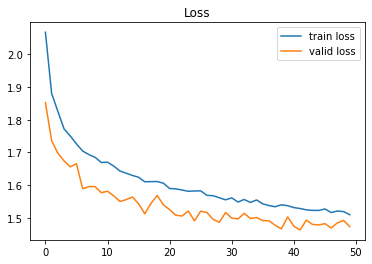

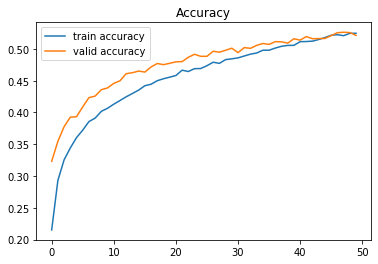

In [10]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()